### IMPORTING THE DEPENDENCIES

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### DATA COLLECTION AND ANALYSIS

In [26]:
#Loading Dataset
customer_data = pd.read_csv('F:/CUSTOMER SEGMENTATION/Mall_Customers.csv')

In [27]:
#First 5 rows
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
#Finding the number of rows and columns
customer_data.shape

(200, 5)

In [29]:
#Information about the Dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
customer_data.drop(columns=['CustomerID'], axis=1, inplace=True)

In [31]:
customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [32]:
#Checking for missing values
customer_data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
#Choosing the Annual Income and Spending Score column
X = customer_data.iloc[:,[2,3]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### CHOOSING CORRECT NUMBER OF CLUSTERS

In [35]:
# WCSS -> WITHIN CLUSTERS SUM OF SQUARES
# Finding WCSS values for different number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


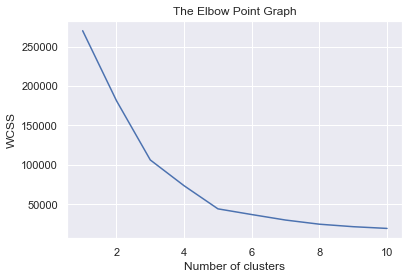

In [36]:
#Plotting an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Optimum number of clusters = 5

### TRAINING THE K-MEANS CLUSTERING MODEL

In [37]:
kmeans1 = KMeans(n_clusters=5,init='k-means++',random_state=0)

#Return a label for each datapoint based on their cluster
Y = kmeans1.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### VISUALIZING ALL THE CLUSTERS

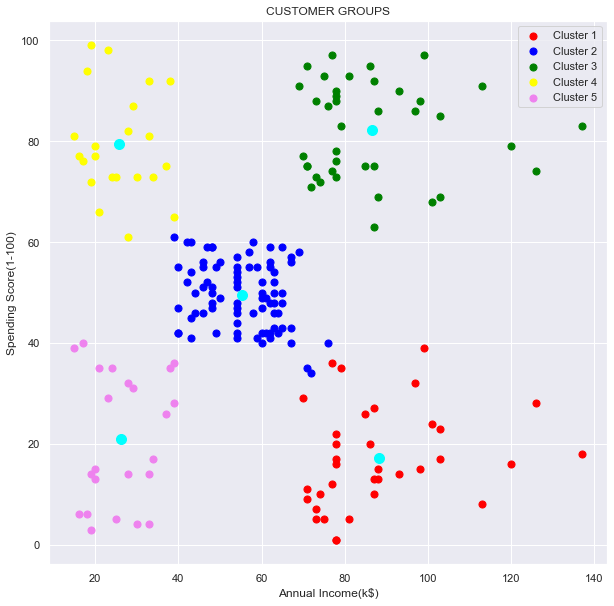

In [38]:
#Plotting all the Clusters and their Centroids

plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='violet', label='Cluster 5')
plt.legend()

#Plot the Centroids
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='cyan', label='Centroid')

plt.title('CUSTOMER GROUPS')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [40]:
#Creating a target column 'Cluster' for storing the Cluster Segment
clustered_customer_data = pd.concat([customer_data,pd.DataFrame({'Cluster':kmeans1.labels_})], axis=1)
clustered_customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,0
197,Male,32,126,74,2
198,Male,32,137,18,0


### DIVIDING CUSTOMERS WITH RESPECT TO CLUSTER

In [41]:
cluster1 = clustered_customer_data[clustered_customer_data['Cluster']==0]
cluster1

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,Female,23,70,29,0
128,Male,59,71,11,0
130,Male,47,71,9,0
134,Male,20,73,5,0
136,Female,44,73,7,0
138,Male,19,74,10,0
140,Female,57,75,5,0
144,Male,25,77,12,0
146,Male,48,77,36,0
148,Female,34,78,22,0


In [42]:
cluster2 = clustered_customer_data[clustered_customer_data['Cluster']==1]
cluster2

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,Female,31,39,61,1
46,Female,50,40,55,1
47,Female,27,40,47,1
48,Female,29,40,42,1
49,Female,31,40,42,1
...,...,...,...,...,...
121,Female,38,67,40,1
122,Female,40,69,58,1
126,Male,43,71,35,1
132,Female,25,72,34,1


In [43]:
cluster3 = clustered_customer_data[clustered_customer_data['Cluster']==2]
cluster3

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,Male,39,69,91,2
125,Female,31,70,77,2
127,Male,40,71,95,2
129,Male,38,71,75,2
131,Male,39,71,75,2
133,Female,31,72,71,2
135,Female,29,73,88,2
137,Male,32,73,73,2
139,Female,35,74,72,2
141,Male,32,75,93,2


In [44]:
cluster4 = clustered_customer_data[clustered_customer_data['Cluster']==3]
cluster4

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,Male,21,15,81,3
3,Female,23,16,77,3
5,Female,22,17,76,3
7,Female,23,18,94,3
9,Female,30,19,72,3
11,Female,35,19,99,3
13,Female,24,20,77,3
15,Male,22,20,79,3
17,Male,20,21,66,3
19,Female,35,23,98,3


In [45]:
cluster5 = clustered_customer_data[clustered_customer_data['Cluster']==4]
cluster5

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
2,Female,20,16,6,4
4,Female,31,17,40,4
6,Female,35,18,6,4
8,Male,64,19,3,4
10,Male,67,19,14,4
12,Female,58,20,15,4
14,Male,37,20,13,4
16,Female,35,21,35,4
18,Male,52,23,29,4


<AxesSubplot:xlabel='Cluster', ylabel='count'>

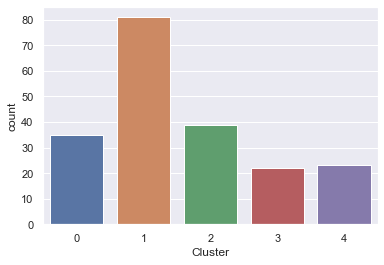

In [46]:
#Visualizing Clustered Customers
sns.countplot(x='Cluster', data=clustered_customer_data)

In [48]:
kmeans1.predict([[65,40]])

array([1])